In [1]:
#Importing the required libraries
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model

In [2]:
#Image generator for image processing
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [3]:

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
# Creating training set
training_set = train_datagen.flow_from_directory('dataset/TRAINING',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# Creating the Test set
test_set = test_datagen.flow_from_directory('dataset/TESTING',
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 817 images belonging to 2 classes.
Found 187 images belonging to 2 classes.


In [4]:
#getting the values for Lumpy Skin and Normal Skin
test_set.class_indices

{'Lumpy_Skin': 0, 'Normal_skin': 1}

In [5]:
#Model for classifucation
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Beach or 1 for Mountain 
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [6]:
#for accuracy of model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
#fitting the model on training dataset
model.fit_generator(training_set , validation_data=test_set, epochs=20)

Epoch 1/20


C:\Users\UMT\AppData\Local\Temp\ipykernel_8344\1443526103.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training_set , validation_data=test_set, epochs=20)


26/26 [==============================] - 15s 568ms/step - loss: 0.6447 - accuracy: 0.6683 - val_loss: 0.5138 - val_accuracy: 0.7005
Epoch 2/20
26/26 [==============================] - 15s 574ms/step - loss: 0.5355 - accuracy: 0.7013 - val_loss: 0.4136 - val_accuracy: 0.7647
Epoch 3/20
26/26 [==============================] - 15s 565ms/step - loss: 0.4888 - accuracy: 0.7625 - val_loss: 0.3607 - val_accuracy: 0.8289
Epoch 4/20
26/26 [==============================] - 15s 592ms/step - loss: 0.4416 - accuracy: 0.7576 - val_loss: 0.3115 - val_accuracy: 0.9037
Epoch 5/20
26/26 [==============================] - 15s 605ms/step - loss: 0.3961 - accuracy: 0.8274 - val_loss: 0.3011 - val_accuracy: 0.8930
Epoch 6/20
26/26 [==============================] - 15s 592ms/step - loss: 0.3764 - accuracy: 0.8397 - val_loss: 0.3181 - val_accuracy: 0.8984
Epoch 7/20
26/26 [==============================] - 16s 601ms/step - loss: 0.3204 - accuracy: 0.8592 - val_loss: 0.2444 - val_accuracy: 0.9037
Epoch 8/20

In [1]:
model.save('lumpy_skin.h5')

NameError: name 'model' is not defined

In [8]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Normal_skin",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Lumpy_Skin",fontsize=30)

1/1 [==============================] - 0s 25ms/step
[[1.]]


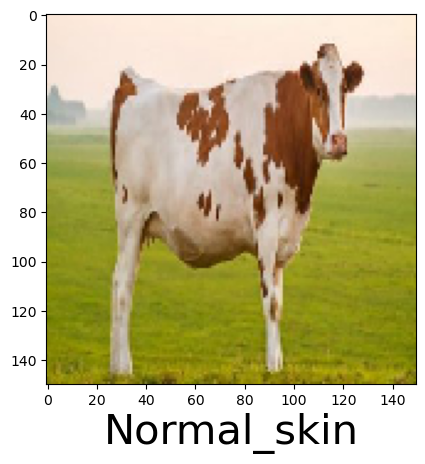

In [10]:
predictImage("Normal_Skin_62.jpg")

In [12]:
predictImage("dog.jpg")

1/1 [==============================] - 0s 25ms/step
[[1.]]
